## Analyses/visualizations done :

#### 1. Trend of speed
#### 2. Trend of acceleration
#### 3.  Plotting route on real map

In [264]:
import matplotlib.pyplot as plt
import mplleaflet as mpl
import pandas as pd
import numpy as np

In [265]:
df = pd.read_csv("datasets/go_trackspoints.csv")

In [266]:
df.head()

,id,latitude,longitude,track_id,time
0,1,-10.939341,-37.062742,1,2014-09-13 07:24:32
1,2,-10.939341,-37.062742,1,2014-09-13 07:24:37
2,3,-10.939324,-37.062765,1,2014-09-13 07:24:42
3,4,-10.939211,-37.062843,1,2014-09-13 07:24:47
4,5,-10.938939,-37.062879,1,2014-09-13 07:24:53


##  1. Find trend of speed over time

In [17]:
# First thing we need is a function which calculates distances betweeen 2 coordinates

def find_distance(lat1, long1, lat2, long2):
    
    DOF_lat = lat1 - lat2
    DOF_long = long1 - long2
    
    dist_lat = DOF_lat * 111139
    dist_long = DOF_long * 111139
    
    dist = np.sqrt((dist_lat*dist_lat) + (dist_long*dist_long))
    
    return dist

In [19]:
# Lets select one trip
df["track_id"].unique()

array([    1,     2,     3,     4,     8,    10,    11,    12,    13,
          14,    16,    17,    18,    19,    20,    21,    22,    23,
          24,    25,    26,    27,    28,    30,    31,    33,    34,
          35,    36,    37,    38,    39,    40,    41,    42,    43,
          44,    45,    46,    47,    48,    49,    50,    51,    54,
          55,    56,    58,    61,    63,    65,    67,    70,    71,
          78,    99,   128,   131,   132,   133,   134,   135,   136,
         137,   138,   139,   140,   141,   142,   143,   145,   146,
         147,   148,   149,   150,   151,   153,   155,   156,   157,
         158,   159,   171,   173,   177,   179,   180,   190,   205,
         206,   207,   208,   209,   210,   248, 32446, 32447, 37945,
       37949, 37951, 37950, 37953, 37954, 37955, 37956, 37957, 37960,
       37961, 37962, 37964, 37965, 37967, 37969, 37971, 37972, 37973,
       37979, 37982, 37983, 37989, 37990, 37992, 37993, 37995, 37996,
       37997, 37998,

In [213]:
trip = 210
trip_filter = df["track_id"] == trip
df_trip = df[trip_filter]
df_trip.head()

,id,latitude,longitude,track_id,time
11643,13039,-10.931753,-37.048020,210,2015-04-29 10:15:23
11644,13040,-10.933105,-37.049386,210,2015-04-29 10:15:40
11645,13041,-10.933613,-37.049766,210,2015-04-29 10:15:53
11646,13042,-10.933684,-37.049856,210,2015-04-29 10:16:05
11647,13043,-10.934434,-37.050033,210,2015-04-29 10:16:23


In [33]:
# Find total duration of trip
from dateutil import parser

In [97]:
# studied about dateutils from google and documentation

df_len = len(df_trip) - 1
start = parser.parse(df_trip["time"].iloc[0])
end = parser.parse(df_trip["time"].iloc[df_len])

time_delta = end - start
total_time = time_delta.total_seconds()

In [99]:
total_time

613.0

In [133]:
# Function to find time between two points:

def find_time(df_trip, loc1, loc2):
    
    start = parser.parse(df_trip["time"].iloc[loc1])
    end = parser.parse(df_trip["time"].iloc[loc2])
    time_delta = end - start
    seconds = time_delta.total_seconds()
    
    return seconds
    
    

In [157]:
df_speed = pd.DataFrame(columns=["speed", "time"])

df_len = len(df_trip) - 1
total_time = 0

for i in range(df_len):
    
    time = find_time(df_trip, i, i+1)
    distance = find_distance(df_trip["latitude"].iloc[i], df_trip["longitude"].iloc[i], df_trip["latitude"].iloc[i+1], df_trip["longitude"].iloc[i+1])
    speed = (distance/time) * (18/5)
    total_time = total_time  + (time/60)
    df_speed = df_speed.append({"speed":speed, "time" : total_time}, ignore_index = True)

In [158]:
df_speed.head()

,speed,time
0,11.328519,0.083333
1,0.000000,0.183333
2,0.000000,0.283333
3,33.725846,0.383333
4,33.805915,0.466667


In [159]:
df_speed.describe()

,speed,time
count,112.000000,112.000000
mean,32.725282,5.167708
std,23.387446,2.963860
min,0.000000,0.083333
25%,13.670170,2.645833
50%,28.470557,5.150000
75%,50.008543,7.720833
max,87.599129,10.216667


**No outliers or invalid values**

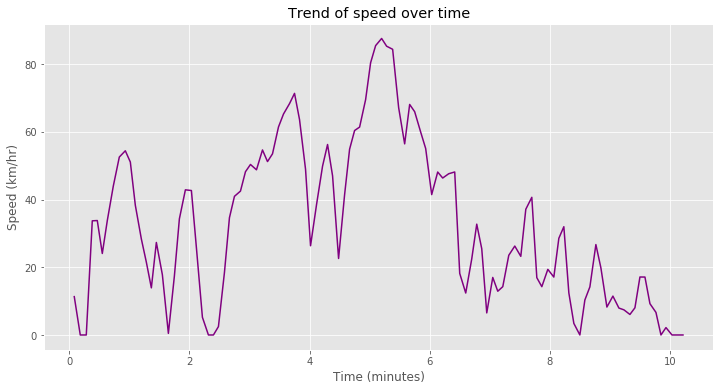

In [195]:
x = np.arange(0,112)
ticks = np.arange(0,112,50)
plt.figure(figsize=(12,6))
plt.title("Trend of speed over time")
plt.style.use("ggplot")
plt.plot(df_speed["time"], df_speed["speed"], color="purple")
plt.xlabel("Time (minutes)")
plt.ylabel("Speed (km/hr)")
plt.show()

**Here we can get an overview of speed of the car over the duration of the whole trip. We can see at which time the driver overspeed, stopped etc.**

## 2. Find trend of acceleration over time

In [174]:
# We can use the dataframe created in above section to find out acceleration

df_acc = pd.DataFrame(columns=["time", "accleration"])

length = len(df_speed) - 1

for i in range(length):
    
    time = (df_speed["time"].iloc[i])*60
    speed_delta = df_speed["speed"].iloc[i+1] - df_speed["speed"].iloc[i]
    time_delta = df_speed["time"].iloc[i+1] - df_speed["time"].iloc[i]
    
    acceleration = speed_delta - time_delta
    
    df_acc = df_acc.append({"time":time, "accleration":acceleration},ignore_index=True)

In [177]:
df_acc.describe()

,time,accleration
count,111.000000,111.000000
mean,307.333333,-0.193350
std,176.266190,10.461242
min,5.000000,-30.053752
25%,157.500000,-6.433517
50%,306.000000,-0.003264
75%,459.000000,6.431678
max,607.000000,33.625846


Text(0, 0.5, 'Acceleration (meter per second square)')

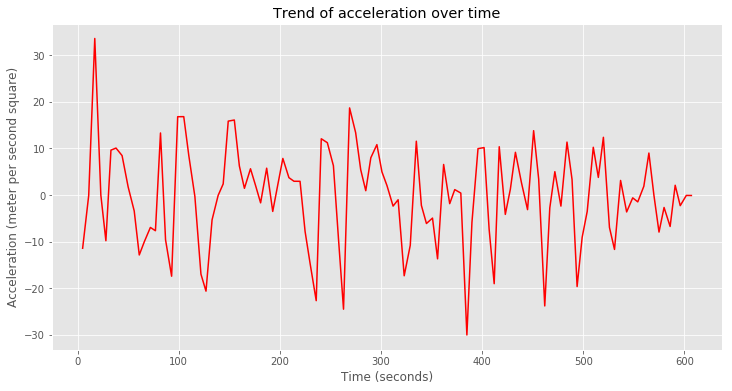

In [189]:
plt.figure(figsize=(12,6))
plt.title("Trend of acceleration over time")
plt.plot(df_acc["time"], df_acc["accleration"], color="red")
plt.xlabel("Time (seconds)")
plt.ylabel("Acceleration (meter per second square)")

* **We can get an idea of drivers driving habits from this trend of acceleration from this graph.**

* **Acceleration is ranging from +30 to -30, based upon whether driver was speeding up or speeding down.**

* **If we see a lot of long spikes in the graph, it means that the driver is suddenly acclerating and braking. Not only it indicates rash driving but also prolongated use of car in this manner may put a stress on its engine.**

* **On the other hand if we see less spikes and more of a smooth graph, it means that the driver is not driving rashly and using fuel efficiently.**

## 3. Plotting location on map

For doing this I will be using mplleaflet library. 
Link : https://github.com/jwass/mplleaflet


### 3.1 Plotting whole route

In [272]:
trip = 1

trip_filter = df["track_id"] == trip
df_trip = df[trip_filter]
df_trip.head()

,id,latitude,longitude,track_id,time
0,1,-10.939341,-37.062742,1,2014-09-13 07:24:32
1,2,-10.939341,-37.062742,1,2014-09-13 07:24:37
2,3,-10.939324,-37.062765,1,2014-09-13 07:24:42
3,4,-10.939211,-37.062843,1,2014-09-13 07:24:47
4,5,-10.938939,-37.062879,1,2014-09-13 07:24:53


In [281]:
plt.plot(df_trip["longitude"],df_trip["latitude"], "rs")
plt.plot(df_trip["longitude"],df_trip["latitude"], "b")
mplleaflet.show()
#mplleaflet.display()

# show() function will open the map in new windows, where as display() will open it in jupyter output window. I have attached a screenshot of the output below
# The map is fully interactable, i.e. you can zoom or pan anywhere

![](images/trip1.PNG)

In [283]:
trip = 4

trip_filter = df["track_id"] == trip
df_trip = df[trip_filter]

plt.plot(df_trip["longitude"],df_trip["latitude"], "rs")
plt.plot(df_trip["longitude"],df_trip["latitude"], "b")
mplleaflet.show()

![](images/trip2.PNG)

### 3.2 Plotting route with specific constraints

We can use this code to only see location data on certain streets, highways etc.


To use this method we need to know coordinates of the street. Since this is practice problem I will randomly assume coordinates of the street.

In [310]:
trip = 4

trip_filter = df["track_id"] == trip
df_trip = df[trip_filter]
df_trip.describe()

,id,latitude,longitude,track_id
count,129.000000,129.000000,129.000000,129.0
mean,291.000000,-10.918409,-37.071355,4.0
std,37.383151,0.002684,0.015573,0.0
min,227.000000,-10.924209,-37.105205,4.0
25%,259.000000,-10.918641,-37.078712,4.0
50%,291.000000,-10.918492,-37.068452,4.0
75%,323.000000,-10.918298,-37.058893,4.0
max,355.000000,-10.908893,-37.052372,4.0


* **Latitude range for the trip :** -10.918409 to -10.908893
* **Longitude range for the trip :** -37.105205 to -37.052372

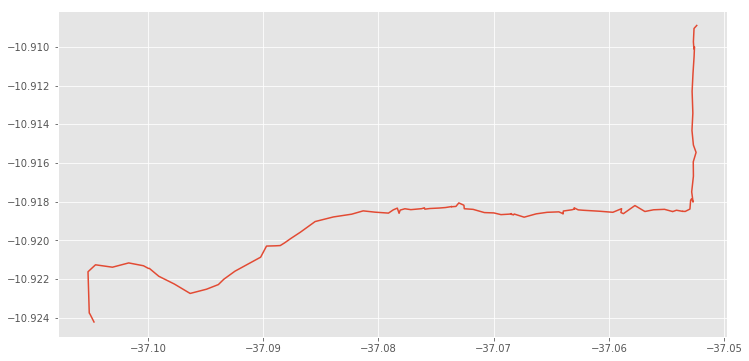

In [313]:
# Lets plot the coordinates to choose a street for our function

plt.figure(figsize=(12,6))
plt.plot(df_trip["longitude"], df_trip["latitude"])
plt.show()


We will assume the street has coordinates 
* start = (-10.920, -37.10)
* end=(-10.924, -37.08)

In [318]:
# A function to return all data points inside the street

def find_route(dfx, lat1, long1, lat2, long2):
    
    if(lat1 > lat2):
        temp = lat1
        lat1 = lat2
        lat2 = temp
        
    if(long1 > long2):
        temp = long1
        long1 = long2
        long2 = temp    
        
    
    lat_filter1 = df_trip["latitude"] >= lat1
    lat_filter2 = df_trip["latitude"] <= lat2
    long_filter1 = df_trip["longitude"] >= long1
    long_filter2 = df_trip["longitude"] <= long2
    
    dfx = dfx[lat_filter1]
    dfx = dfx[lat_filter2]
    dfx = dfx[long_filter1]
    dfx = dfx[long_filter2]
    
    return dfx

In [328]:
# A function to plot points on map using mplleaflet
# This func
def plot_map(dfx):
    plt.plot(dfx["longitude"], dfx["latitude"], "b")
    plt.plot(dfx["longitude"], dfx["latitude"], "rs")
    mplleaflet.show()

In [329]:
df_street = find_route(df_trip, -10.920, -37.10, -10.924, -37.08 )
plot_map(df_street)

![](images/day_4_street.PNG)

* We can see that the function has only shown the route which was in question